In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def rieman_kiri(f, a, b, n):
    h = (b-a)/n
    sigma = 0
    for i in range(0, n):
        sigma += f(a + i * h)
    return h * sigma

def rieman_kanan(f, a, b, n):
    h = (b-a)/n
    sigma = 0
    for i in range(1, n + 1):
        sigma += f(a + i * h)
    return h * sigma

def rieman_tengah(f, a, b, n):
    h = (b-a)/n
    sigma = 0
    for i in range(0, n):
        sigma += f(((a + i * h) + (a + (i + 1) * h)) / 2)
    return h * sigma

def trapesium(f,a,b,n):
    h = (b-a)/n
    sigma=0
    for i in range(0, n):
        sigma += (f(a + i * h) + f(a + ( i + 1) * h))
    return h / 2 * sigma

def simpson(f, a, b, n):
    h = (b-a)/n
    sigma = f(a) + f(b)

    for i in range(1, n):
        if i % 2 != 0:
            sigma += 4 * f(a + i * h)
        else:
            sigma += 2 * f(a + i * h)
        
    return h / 3 * sigma

def INT_215150201111011(f, a, b, n, pilihan):
    if pilihan == "rieman_kiri":
        return rieman_kiri(f, a, b, n)
    elif pilihan == "rieman_kanan":
        return rieman_kanan(f, a, b, n)
    elif pilihan == "rieman_tengah":
        return rieman_tengah(f, a, b, n)
    elif pilihan == "trapesium":
        return trapesium(f, a, b, n)
    elif pilihan == "simpson":
        return simpson(f, a, b, n)

def f(x): return 3 * x ** 2 * (x ** 3 + 2) ** 2

if __name__ == "__main__":
    hasil_analitik = 992/3
    hasil_numerik = pd.DataFrame(columns=[
        "n", "Rki", "Rka", "RT", "Tp", "Pr", 
        "err_Rki", "err_Rka", "err_RT", "err_Tp", "err_Pr"]
        )
    for n in range(2, 21):
        hasil_numerik.loc[n] = [
            n, 
            INT_215150201111011(f, 0, 2, n, "rieman_kiri"),
            INT_215150201111011(f, 0, 2, n, "rieman_kanan"),
            INT_215150201111011(f, 0, 2, n, "rieman_tengah"),
            INT_215150201111011(f, 0, 2, n, "trapesium"),
            INT_215150201111011(f, 0, 2, n, "simpson"),
            abs(hasil_analitik - INT_215150201111011(f, 0, 2, n, "rieman_kiri")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 2, n, "rieman_kanan")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 2, n, "rieman_tengah")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 2, n, "trapesium")),
            abs(hasil_analitik - INT_215150201111011(f, 0, 2, n, "simpson"))
        ]

In [21]:
hasil_numerik

,n,Rki,Rka,RT,Tp,Pr,err_Rki,err_Rka,err_RT,err_Tp,err_Pr
2,2.0,27.000000,1227.000000,198.398438,627.000000,436.000000,303.666667,896.333333,132.268229,296.333333,105.333333
3,3.0,72.598689,872.598689,263.099832,472.598689,318.190520,258.067977,541.932023,67.566834,141.932023,12.476147
4,4.0,112.699219,712.699219,290.755463,412.699219,341.265625,217.967448,382.032552,39.911204,82.032552,10.598958
5,5.0,143.839101,623.839101,304.538754,383.839101,272.448504,186.827566,293.172434,26.127913,53.172434,58.218163
6,6.0,167.849261,567.849261,312.297881,367.849261,332.932785,162.817406,237.182594,18.368785,37.182594,2.266118
7,7.0,186.670892,529.528035,317.070862,358.099463,270.004122,143.995775,198.861368,13.595805,27.432797,60.662545
8,8.0,201.727341,501.727341,320.207205,351.727341,331.403381,128.939326,171.060674,10.459461,21.060674,0.736715
9,9.0,214.005092,480.671758,322.375114,347.338425,274.658256,116.661575,150.005092,8.291552,16.671758,56.008411
10,10.0,224.188927,464.188927,323.934657,344.188927,330.972203,106.477739,133.522261,6.732010,13.522261,0.305536
11,11.0,232.762290,450.944108,325.093309,341.853199,280.103045,97.904377,120.277441,5.573358,11.186532,50.563621


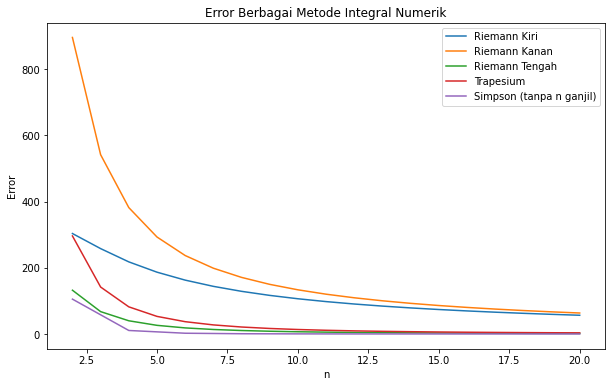

In [48]:
# err_Rki

err_Rki = hasil_numerik["err_Rki"]
err_Rka = hasil_numerik["err_Rka"]
err_RT = hasil_numerik["err_RT"]
err_Tp = hasil_numerik["err_Tp"]
err_Pr = hasil_numerik[hasil_numerik["n"] % 2 == 0]["err_Pr"]
n = hasil_numerik["n"]
n_Pr = hasil_numerik[hasil_numerik["n"] % 2 == 0]["n"]

plt.figure(figsize=(10, 6))
plt.plot(n, err_Rki, label="Riemann Kiri")
plt.plot(n, err_Rka, label="Riemann Kanan")
plt.plot(n, err_RT, label="Riemann Tengah")
plt.plot(n, err_Tp, label="Trapesium")
plt.plot(n_Pr, err_Pr, label="Simpson (tanpa n ganjil)")
plt.legend()
plt.xlabel("n")
plt.ylabel("Error")

plt.title("Error Berbagai Metode Integral Numerik")

plt.show()

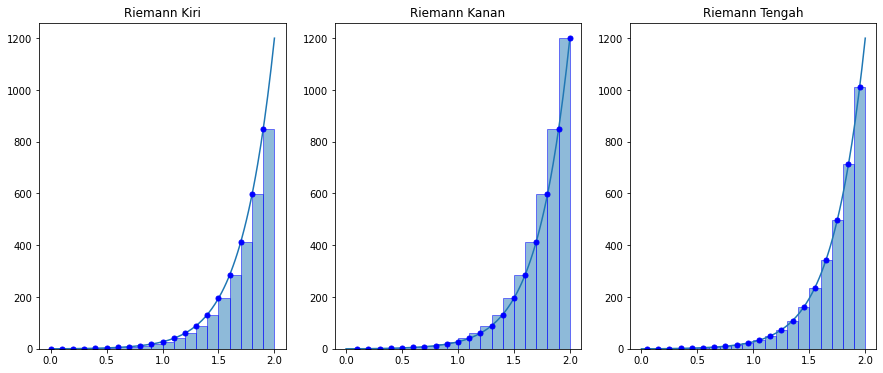

In [82]:
# Visualisasi Integral Riemman

a = 0
b = 2
n = 20

x = np.linspace(a, b, n+1)
y = f(x)

X = np.linspace(a, b, 10*n+1)
Y = f(X)

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.plot(X, Y)
x_left = x[:-1]
y_left = y[:-1]
plt.plot(x_left, y_left, 'b.', markersize=10)
plt.bar(x_left, y_left, width=(b-a)/n, alpha=0.5, align='edge', edgecolor='b')
plt.title("Riemann Kiri")

plt.subplot(1, 3, 2)
plt.plot(X, Y)
x_right = x[1:]
y_right = y[1:]
plt.plot(x_right, y_right, 'b.', markersize=10)
plt.bar(x_right, y_right, width=-(b-a)/n, alpha=0.5, align='edge', edgecolor='b')
plt.title("Riemann Kanan")

plt.subplot(1, 3, 3)
plt.plot(X, Y)
x_mid = (x[:-1] + x[1:]) / 2
y_mid = f(x_mid)
plt.plot(x_mid, y_mid, 'b.', markersize=10)
plt.bar(x_mid, y_mid, width=(b-a)/n, alpha=0.5, edgecolor='b')
plt.title("Riemann Tengah")

plt.show()

In [87]:
hasil_numerik["Rki"] = hasil_numerik["Rki"].apply(lambda x: round(x, 4))
hasil_numerik["Rka"] = hasil_numerik["Rka"].apply(lambda x: round(x, 4))
hasil_numerik["RT"] = hasil_numerik["RT"].apply(lambda x: round(x, 4))
hasil_numerik["Tp"] = hasil_numerik["Tp"].apply(lambda x: round(x, 4))
hasil_numerik["Pr"] = hasil_numerik["Pr"].apply(lambda x: round(x, 4))
hasil_numerik["err_Rki"] = hasil_numerik["err_Rki"].apply(lambda x: round(x, 4))
hasil_numerik["err_Rka"] = hasil_numerik["err_Rka"].apply(lambda x: round(x, 4))
hasil_numerik["err_RT"] = hasil_numerik["err_RT"].apply(lambda x: round(x, 4))
hasil_numerik["err_Tp"] = hasil_numerik["err_Tp"].apply(lambda x: round(x, 4))
hasil_numerik["err_Pr"] = hasil_numerik["err_Pr"].apply(lambda x: round(x, 4))

In [83]:
hasil_numerik.to_csv("hasil_numerik.csv", index=False)